# Clase 4: Visualización de la Información

### Librería seaborn
Seaborn es una de las librerías populares para obtener fácilmente gráficos más elegantes y variados que los básicos de matplotlib, sin hacer excesos de configuraciones en ellos. En efecto, seaborn es una interface de alto nivel de matplotlib especializada en gráficos estadísticos.

In [100]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

La data a utilizar es happiness.csv, la cual contiene un ranking de felicidad de los paises y las dimensiones evaluadas para obtener ese ranking.

In [101]:
region = pd.read_csv('Data/region.csv')
happiness = pd.read_csv('Data/happiness.csv')
happiness = (happiness.
                merge(region, on = 'Country'))
happiness.head(5)

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual,Region
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027,Western Europe
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707,Western Europe
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715,Western Europe
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716,Western Europe
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182,Western Europe


Veamos los mismo gráficos vistos en la clase pasada.

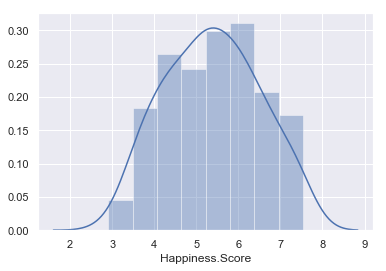

In [102]:
sns.distplot(happiness['Happiness.Score'])

En general displot permite graficar distribuciones, aquí los argumentos más relevantes

``sns.displot(a, bins=None, hist=True, kde=True, rug=False, color=None, vertical=False, norm_hist=False)``

* **a**: Es el arreglo de datos a graficar
* **bins**: Número de particiones para el histograma
* **hist**: Booleano para indicar si se incorpora el histograma en el gráfico
* **kde**: Booleano para indicar si se incorpora la curva de suavizamento de distribución en el gráfico
* **rug**: Booleano para indicar si se incorpora el gráfico de alfombra
* **color**: Color
* **vertical**: Indicador si el gráfico debiera ser vertica
* **norm_hist**: Normalización del KDE plot como densidad de probabilidades


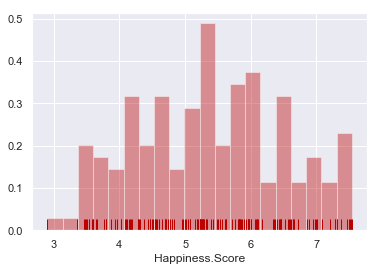

In [99]:
sns.set(style = "darkgrid")
sns.distplot(a = happiness['Happiness.Score'],
            bins = 20,
            hist = True,
            kde = False,
            rug = True,
            color = "#BB0000",
            vertical = False,
            norm_hist = True)

La clase anterior se comentó que existe un hermano menor (más reciente) del histograma, el cual es el gráfico de densidad, el distplot es el nombre genérico en seaborn para mostrar distribuciones pero para ir más especifico al KDE (Kernel Density Estimation) plot, existe una función especifica para eso. 

``sns.kdeplot(data, data2=None, shade=False, vertical=False, kernel='gau', legend=True, cumulative=False, color)``
* **data:** Datos
* **data2:** Segunda data en caso de querer ver una distribución bivariada
* **shade:** Indicador de relleno de la curva
* **vertical:** Al igual que en el histograma
* **kernel:** El kernel a usarse para la estimación kernel
* **legend:** Legenda
* **cumulative:** Indicador de distribución acumulada
* **color:** color



In [ ]:
sns.kdeplot(data = happiness['Happiness.Score'],
           shade = True,
           vertical = False,
           kernel = 'gau',
           cumulative = False,
           color = "#BB0000")

Notaron la segunda data?

In [ ]:
sns.kdeplot(data = happiness['Happiness.Score'],
            data2 = happiness['Health..Life.Expectancy.'],
           shade = True,
           vertical = False,
           kernel = 'gau',
           cumulative = False,
           color = "#BB0000")

Sin embargo para la visualización de data bivariada es más informativo el jointplot

``sns.jointplot(x, y, kind='scatter', color=None)``

* **x** = Data del eje x
* **y** = Data del eje y
* **kind** = Tipo de gráfico (scatter, hex, reg, resid, kde)
* **color** = color

In [ ]:
sns.jointplot(happiness['Happiness.Score'],
            happiness['Health..Life.Expectancy.'],
             kind = 'kde')

En caso de querer ver todas las relaciones bivariadas, se puede utilizar el pairplot

In [ ]:
sns.pairplot(happiness)

La clase pasada vimos los boxplots, en este caso es algo más intuitivo de hacerlos, basta con difinir la data como ejes, siendo uno de ellos una variable categorica.

``sns.boxplot(x=None, y=None, hue=None, data=None, order=None, hue_order=None, orient=None, color=None, palette=None, saturation=0.75, width=0.8, dodge=True, fliersize=5, linewidth=None, whis=1.5)``

* **x** = Data del eje x
* **y** = Data del eje y
* **hue** = Se puede incorporar una tercera variables para mostrarlos como cajones agrupados
* **Color** = Color
* **saturation:** = Saturacion de color

In [ ]:
plt.figure(figsize = (14,4))
sns.boxplot(x = 'Region', 
           y = 'Happiness.Score',
           data = happiness.query('Region != "Australia and New Zealand"'))
plt.xticks(rotation=90)
plt.show()

Notaron que seaborn está completamente integrado con matplotlib?

In [ ]:
plt.figure(figsize = (14,8))
plt.subplot(211)
sns.boxplot(x = 'Region', 
           y = 'Happiness.Score',
           data = happiness.query('Region != "Australia and New Zealand"'))
plt.xticks(rotation=10)
plt.subplot(212)
sns.violinplot(x = 'Region', 
           y = 'Happiness.Score',
               data = happiness.query('Region != "Australia and New Zealand"'),
              width = 1)
plt.xticks(rotation=10)
plt.show()

### Librería Plotly

Plotly es una librería general, disponible para Python, R, Ruby, nodeJS, entre otros. Su principal función es la generación de gráficos interactivos diseñados para ser integrados en aplicaciones web o móvil de reportería. Su uso y diseño exige más líneas de código por lo cual se sugiere el uso para los casos mencionados

In [ ]:
from plotly.offline import download_plotlyjs, plot, iplot
from plotly.graph_objs import *

### Gráficos univariados

Todos los gráficos de plotly siguen la misma mecánica, se deben definir las opciones del gráfico y luego se llaman con el comando plot

In [ ]:
h = Histogram(x = happiness['Happiness.Score'])
plot([h])

Como se puede ver ese es el gráfico más simple posible. Vamos a ir personalizado el gráfico de a poco. Primero hay que tener en claro que el comando plot sólo se encarga de llamar el HTML del gráfico. Antes de ponernos a cambiar configuraciones con código, vamos a ver los elementos del gráfico.

1. **Datos:** Se refiere a la data de origen que utiliza la visualización
2. **Tipo/forma/geometría:** Cómo queremos que se vea el gráfico ¿una línea? ¿barras?
3. **Marker:** El elemento básico del gráfico, en un gráfico de puntos pueden ser el color y la forma de los puntos, en un histograma, el color y separación de las barras.
4. **Layout:** Como se dispone el gráfico para una visualización.
5. **Labels:** Indicadores de qué está midiendo el gráfico, ya sea en los ejes, serie o incluso el título.
6. **Ejes:** Los ejes, escala, disposición, entre otros.

Los datos están ya controlados, la geometría se controla de acuerdo a la palabra clave del gráfico (Histogram, Boxplot, etc.)
Vemos que podemos hacer con el "Marker", este usualmente es sub-atributo de la geometría.

In [ ]:
geom = Histogram(x = happiness['Happiness.Score'],
               marker = {'color': '#9999FF',
                         'line': {'color': '#FFFFFF',
                                  'width': 1},
                         'opacity': 0.6})
plot([geom])

Los parámetros del gráfico se van configurando por separados, con diccionarios en donde el nombre de la llave es la opción y el o los valores son el atributos que adquieren. Como se pudo ver en el ejemplo, el "line" es un atributo del gráfico que es otro diccionario, pues tiene sus opciones propias. 

En principio de ven complejas las opciones, pero a la larga nos termina ayudando en generar una correcta visualización.

Ya vimos las opciones más importantes del Marker (para el histograma), Veamos algo del layout.

In [ ]:
geom = Histogram(x = happiness['Happiness.Score'],
               marker = {'color': '#9999FF',
                         'line': {'color': '#FFFFFF',
                                  'width': 1},
                         'opacity': 0.6})

lay = Layout(
    title = 'Puntaje de Felicidad',
    xaxis = {
        'showgrid': False,
        'showticklabels': True,
        'title': 'Puntaje'
    }, 
    yaxis = {
        'showgrid': True,
        'showticklabels': True,
        'title': 'Frecuencia'
    }     
    )
fig = Figure(data = [geom], layout = lay)
plot(fig)


Si son observadores, el geom va en un arreglo ¿por qué? esto es pues se pueden incorporar más de un gráfico. Comparemos los histogramas de Europa del este y Europa occidental

In [ ]:
geom_we = Histogram(x = happiness.query('Region == "Western Europe"')['Happiness.Score'],
               marker = {'color': '#5555FF',
                         'line': {'color': '#FFFFFF',
                                  'width': 1},
                         'opacity': 0.6},
                   name = 'Europa Occidental')

geom_ee = Histogram(x = happiness.query('Region == "Central and Eastern Europe"')['Happiness.Score'],
               marker = {'color': '#55FF55',
                         'line': {'color': '#FFFFFF',
                                  'width': 1},
                         'opacity': 0.6},
                   name = 'Europa del Este')

lay = Layout(
    title = 'Felicidad Europa Occidental vs Europa del Este',
    barmode = 'overlay'
)

fig = Figure(data = [geom_we, geom_ee], layout = lay)

plot(fig)


**Ejercicio:**
1. Haga un histograma del puntaje del item "Family".
2. Al gráfico anterior cambie el color de las barras a Naranjo
3. Cambie el color de los bordes a negro.
4. Ponga títulos a los ejes y al gráfico.



Una de las particularidades de plotly, es que presenta "hoverlabels", es decir marcas que aparecen al posar el puntero sobre el gráfico. Estas también son configurables.

In [ ]:
happiness.columns

In [ ]:
geom = Histogram(x = happiness['Family'],
               marker = {'color': '#FF9999',
                         'line': {'color': '#000000',
                                  'width': 1},
                         'opacity': 0.6},
                hoverlabel = {'font': {'family': 'Arial',
                                       'size': 30,
                                       'color': '#009000'},
                              'bgcolor': '#FFFFFF'
                             })

lay = Layout(
    title = 'Puntaje de Felicidad por Familia',
    xaxis = {
        'showgrid': False,
        'showticklabels': False,
        'title': 'Puntaje'
    }, 
    yaxis = {
        'showgrid': False,
        'showticklabels': False,
        'title': 'Frecuencia'
    }     
    )
fig = Figure(data = [geom], layout = lay)
plot(fig)

Es importante saber resaltar lo que queremos mostrar. Como regla general, usar colores fuertes hacia la idea que queremos hacer énfasis, mientras que colores tenues para la información que debe mostrarse pero no queremos desviar la atención a ella.

En plotly se puede marcar la información y se puede configurar de tal forma que los colores tengan los atributos especificados.

In [ ]:
geom = Histogram(x = happiness['Happiness.Score'],
               marker = {'color': '#AAAAAA',
                         'line': {'color': '#FFFFFF',
                                  'width': 1},
                         'opacity': 0.6},
                selected = {'marker': {'color': '#FF0000'}})


fig = Figure(data = [geom])
plot(fig)

Dado que ya sabemos las mecánicas de plotly, podemos ver otros tipos de gráficos. Veremos los mismo datos con otras geometrias

#### Box-plot

In [ ]:
geom = Box(x = happiness['Happiness.Score'],
               marker = {'color': '#9999FF',
                         'opacity': 0.6})
plot([geom])

No se cambió nada con respecto a histograma, sólo la forma en que se mostrará la misma información. Si queremos mostrar más de un gráfico siempre hay que hacer más trazas. En el caso de los box-plot en particular, es habitual que estos estén separados. Esto se puede obtener usando compresión de listas

In [ ]:
#import colorlover as cl
lista_regiones = happiness.Region.unique()

geom = [Box(y = happiness[happiness['Region'] == i]['Happiness.Score'],
            marker = {
                'color': '#99BB99'},
            name = i
           ) for i in lista_regiones]

plot(geom)

### Gráficos de variables categóricas

Ejemplos de este tipo de gráficos son los de barras o los de torta.
Para un gráfico de variables categóricas, basta indicar dos argumentos. Los valores y los labels (en estricto rigor con los valores basta)

In [ ]:
values = [4500,2500,1053,500]

trace = Pie(values=values)
plot([trace])

Vamos a generar un gráfico de torta de la cantidad de paises por región. 

In [ ]:
n_paises = happiness.groupby(['Region'])['Region'].count()
trace = Pie(values = n_paises.values)
plot([trace])

In [ ]:
n_paises = happiness.groupby(['Region'])['Region'].count()
n_paises.index

Al gráfico anterior añadamos los labels.

In [ ]:
n_paises = happiness.groupby(['Region'])['Region'].count()
trace = Pie(values = n_paises.values,
           labels = n_paises.index)
plot([trace])

¿Qué tal si les cambiamos los colores? Por ejemplo en una escala de rojo a blanco

In [ ]:
n_paises = happiness.groupby(['Region'])['Region'].count()
n = len(n_paises)
colores = ['rgb(' + str(255 - i * 255 / n) + ', 150, 150)' for i in range(n)]

trace = Pie(values = n_paises.values,
           labels = n_paises.index,
           marker = {'colors': colores})
plot([trace])

In [ ]:
n_paises = happiness.groupby(['Region'])['Region'].count()
n = len(n_paises)
colores = ['rgb(' + str(255 - i * 255 / n) + ', 150, 150)' for i in range(n)]

Se ve feo, hay que tener en cuenta que los colores van a ir alineados con el nombre, por lo cual es bueno ordenarlos según la disposición que queremos que aparezcan.

Para el de barras, si ya se habrán imaginado, basta cambiar la geometría pues es la misma naturaleza de datos.

In [ ]:
n_paises = happiness.groupby(['Region'])['Region'].count()
trace = Bar(y = n_paises.values,
           x = n_paises.index)
plot([trace])

Para agrupar o apilar barras, las cuales son las otras modalidades habituales para presentar gráficos de barras, se requiere generar gráficos de cada grupo y luego especificar su disposición en el layout. Vamos a ver un ejemplo con los puntajes medios de libertad (Freedrom), Salud (Health..Life.Expectancy) y economía (Economy..GDP.per.Capita)

In [ ]:
fre = happiness.groupby(['Region'])['Freedom'].mean()
sal = happiness.groupby(['Region'])['Health..Life.Expectancy.'].mean()
eco = happiness.groupby(['Region'])['Economy..GDP.per.Capita.'].mean()

tr1 = Bar(y = fre.values,
           x = fre.index,
         name = 'Libertad')
tr2 = Bar(y = sal.values,
           x = sal.index,
         name = 'Salud')
tr3 = Bar(y = eco.values,
           x = eco.index,
         name = 'Economía')

lay = Layout(barmode = 'stack')
# La otra opción es stack
fig = Figure(data = [tr1, tr2, tr3], layout = lay)
plot(fig)

**Ejercicio:** 
1. Cree un gráfico de barras de tal que aparezca los paises del sud-este asiático según puntaje en el item salud (Health..Life.Expectancy.). El gráfico debe ser horizontal
2. Al gráfico anterior ponga los nombres de los paises en el eje correspondiente.
3. A la visualización anterior añada la información del item familia (Family), la visualización se debe mostrar como gráfico apilado. 

### Gráficos Bivariados

Cuando se habla de gráficos bivariados, normalmente nos referimos al scatterplot. Vamos a ver su funcionamiento 

In [ ]:
tr = Scatter(
    x = happiness['Health..Life.Expectancy.'],
    y = happiness['Economy..GDP.per.Capita.'],
    mode = 'markers'
)

plot([tr])

Típicamente un usuario nos puede preguntar "¿Quién es el punto que está en tal parte?" para esto es bueno aplicar labels en los puntos.

In [ ]:
tr = Scatter(
    x = happiness['Health..Life.Expectancy.'],
    y = happiness['Economy..GDP.per.Capita.'],
    mode = 'markers',
    text = happiness['Country']
)

lay = Layout(
    title = 'Salud vs Economía',
    xaxis = {
        'title': 'Salud'
    },
    yaxis = {
        'title': 'Economía'
    }    
)
fig = Figure(data = [tr], layout = lay)
plot(fig)

**Ejercicio:** 
1. Cree un gráfico de dispersión del puntaje total vs el puntaje de economía.
2. Haga que en cada punto se marque en el label del punto la región a la que pertenece el punto.
3. Al gráfico anterior modificarlo de tal forma que los paises de América Latina y el Caribe sean marcados con otro color.

Cuando los datos sus muchos ocurre el siguiente problema.

In [ ]:
happiness.columns

In [ ]:
happiness.groupby(['Region'])['Country'].count().reset_index()

In [ ]:
tr = Scatter(
    x = happiness['Happiness.Score'],
    y = happiness['Economy..GDP.per.Capita.'],
    mode = 'markers',
    text = happiness['Region']
)

lay = Layout(
    title = 'Salud vs Economía',
    xaxis = {
        'title': 'Salud'
    },
    yaxis = {
        'title': 'Economía'
    }    
)
fig = Figure(data = [tr], layout = lay)
plot(fig)

In [ ]:
N = 6000
random_x = np.random.normal(size = N, loc = 1, scale = 4)
random_y = np.random.normal(size = N, loc = 2, scale = 5)

gr = Scatter(
    x = random_x,
    y = random_y,
    mode = 'markers'
)
fig = Figure(data = [gr])
plot(fig)

Exacto!, no se ve absolutamente nada!. Existen técnicas para tratar este problema. Veremos una de ellas.

La idea es controlar la opcacidad de los markers, de esta forma se puede tener una idea de las zonas con mayor densidad de información.

In [ ]:
gr = Scatter(
    x = random_x,
    y = random_y,
    mode = 'markers',
    marker = {'opacity': 0.2}
)
fig = Figure(data = [gr])
plot(fig)

De cualquier forma una cantidad suficiente de datos hace que esa técnica siga siendo poco viable, otra opcción es un gráfico de densidad.

In [ ]:
tr1 = Scatter(
    x = random_x,
    y = random_y,
    mode = 'markers',
    marker = {'color': 'rgb(102,0,0)',
              'size': 2,
              'opacity': 0.4}
)
tr2 = Histogram2dcontour(
    x = random_x,
    y = random_y,
    ncontours = 15,
    colorscale = 'Jet',
    showscale = False
)

fig = Figure(data = [tr1, tr2])
plot(fig)

### Subplots

Los subplot siguen la misma lógica de matrices que en varios frameworks

In [ ]:
from plotly import tools

tr1 = Scatter(x=[1, 2, 3], y=[4, 5, 6])
tr2 = Scatter(x=[20, 30, 40], y=[50, 60, 70])
tr3 = Scatter(x=[300, 400, 500], y=[600, 700, 800])
tr4 = Scatter(x=[4000, 5000, 6000], y=[7000, 8000, 9000])

fig = tools.make_subplots(rows=2, cols=2, subplot_titles=('Plot 1', 'Plot 2',
                                                          'Plot 3', 'Plot 4'))

fig.append_trace(tr1, 1, 1)
fig.append_trace(tr2, 1, 2)
fig.append_trace(tr3, 2, 1)
fig.append_trace(tr4, 2, 2)

fig['layout'].update(height=600, width=600, title='Subplots')
plot(fig)


### Tablas

Además de los gráficos, se pueden incorporar tablas. Esto será solo un ejemplo básico para explorar el potencial del plotly.


In [ ]:
tr = Table(
    header = {'values': ['Columna 1', 'Columna 2'],
             'fill': {'color': '#99AA99'},
             'line': {'color': '#FFFFFF'}},
    cells = {'values': [['C11', 'C21', 'C31', 'C41'],
                       ['C12', 'C22', 'C32', 'C42']],
            'fill': {'color': '#BBCCBB'}
            })
fig = Figure(data = [tr])
plot(data)

**Ejercicio:** Genere una tabla con los puntajes totales más altos de cada región.

Para finalizar, los gráficos vistos no sirven de nada si no son exportables y usables por otro usuario. Los gráficos son exportados como HTML, para ello en el comando plot, se debe especificar el nombre del html a exportar.

In [ ]:
tr = Scatter(
    x = happiness['Health..Life.Expectancy.'],
    y = happiness['Economy..GDP.per.Capita.'],
    mode = 'markers',
    text = happiness['Country']
)

lay = Layout(
    title = 'Salud vs Economía',
    xaxis = {
        'title': 'Salud'
    },
    yaxis = {
        'title': 'Economía'
    }    
)
fig = Figure(data = [tr], layout = lay)


plot(fig, filename = 'mi_gráfico')

Es un archivo, no requiere conexión a internet, pero requiere un navegador que interprete ese html. Luego en Power Point o Latex, simplemente aplicar un hipervínculo al archivo que contine el html.


Entonces.... ¿cuál usar?, pues depende, aquí se adjunta una tabla que las compara

![alt text](IMG/Tabla.PNG)
